In [2]:
#Assignment #2 VidalDosSantos, Jelic, Forte
#read in bibs for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in data edited file from Assignment#1, set edited column ID als index col --> otherwise a second id column would be generated...
accidents = pd.read_csv('data/edited_file.csv', index_col='ID')

In [7]:
#set the max output number for the columns to none so all columns get displayed for this call + show head
#get overview of all columns of the new file
pd.set_option('display.max_columns', None)
accidents.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
#revert function above so not all are shown...
pd.reset_option('display.max_columns')

In [9]:
#check types of attributes --> evaluate which columns are suitable for different types of diagramms !good Overview!
accidents.dtypes

Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing  

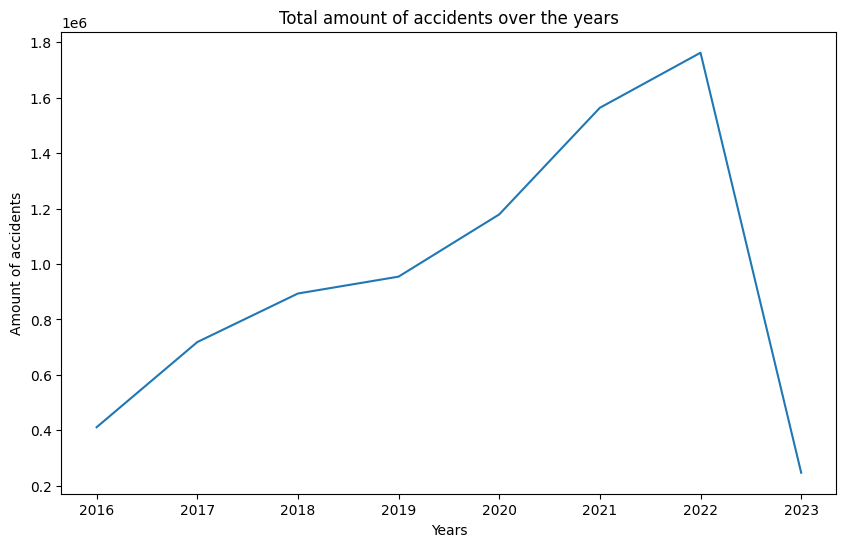

In [31]:
#create line-chart --> yearly (total) amount of accidents to see trends
#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

#title
ax.set_title("Total amount of accidents over the years")
#set naming for axes
ax.set_xlabel("Years")
ax.set_ylabel("Amount of accidents")

#insert data
#convert to String in order to execute str ops
accidents['Start_Time'] = accidents['Start_Time'].astype(str)
#clean Startdate so fractions are getting truncated
accidents['Start_Time'] = accidents['Start_Time'].str.split('.').str[0]
#convert Start_time from object to dateTime
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
#Extract Year from Start_Time
accidents['Year'] = accidents['Start_Time'].dt.year
#Count total amount of accidents
total_amount_of_accidents_per_year = accidents['Year'].value_counts().sort_index()
#plot the index/values
ax.plot(total_amount_of_accidents_per_year.index, total_amount_of_accidents_per_year.values)

plt.show()
#This chart shows how the the total amount of accidents changes over the year. It is clear that the amount of accidents increased during the last years. in 2023 there is a down peak... 
#Interpretation: The data for 2023 is incomplete (only jan and feb) therefore there is less data available.

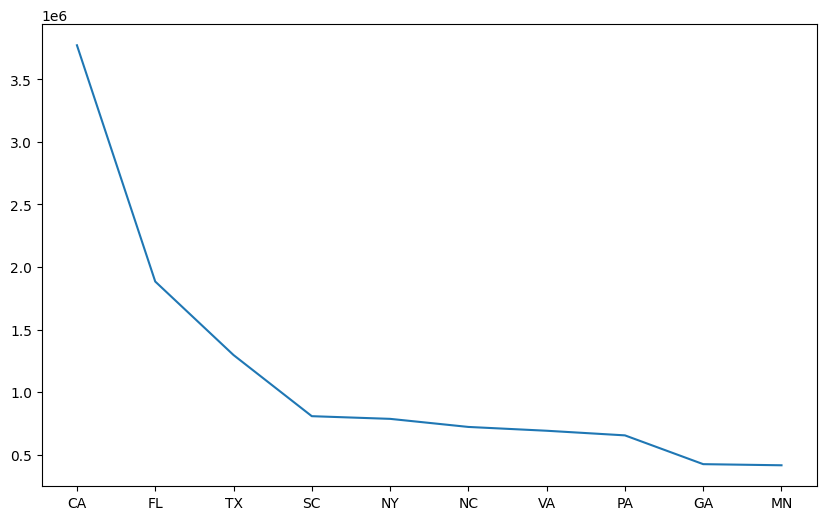

In [32]:
#Working line graph as alternative
severity_sum = accidents.groupby('State')['Severity'].sum()
top10states = severity_sum.nlargest(10)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("")
ax.set_ylabel("")

ax.plot(top10states.index, top10states.values)
plt.show()

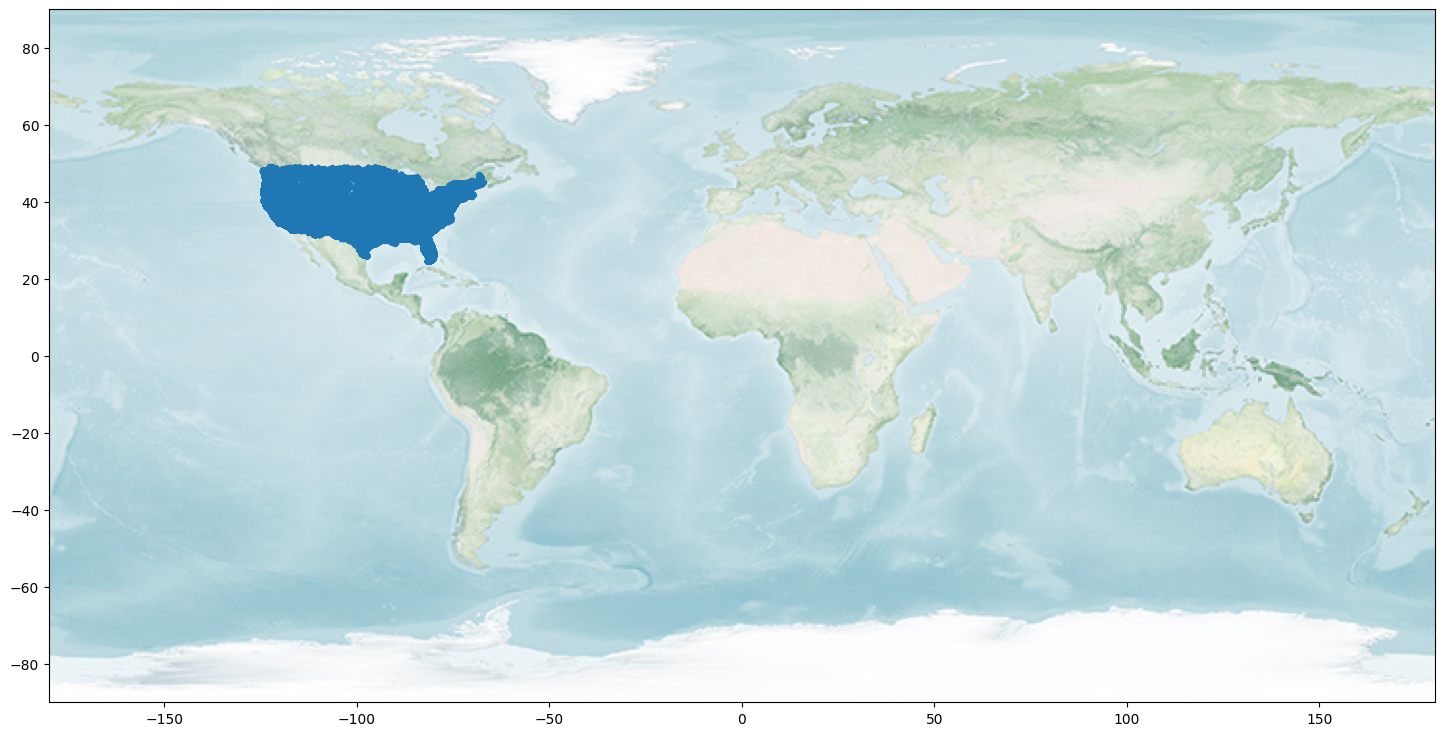

In [45]:
#creation of scatter-plot
# Create a plot with a given size
worldmap = plt.imread('img/eo_base_2020_clean_720x360.jpg')
# Seitenverhältnis des Bilds berechnen: Breite des Bilds / Höhe des Bilds
# aspect_ratio = worldmap.shape[1] / worldmap.shape[0]
# Das Bild ist eine "platte" Projektion der Erde, so das wir Geographische
# Koordinaten direkt als x,y Position auf dem Bild verwenden können
# Bounding Box: links, rechts, unten, oben
# Das Bild geht von -180 bis +180 Längengrad und von -90 bis +90 Breitengrad
bbox = (-180, 180, -90, 90)
us_bbox = (-125, -66, 24, 50)

# Erstellen eines Plots mit gegebener Größe
fig, ax = plt.subplots(figsize=(18, 9))

# Koordinatensystem über Bild legen
ax.set_xlim(bbox[0], bbox[1])
ax.set_ylim(bbox[2], bbox[3])

# Anzeigen des Bilds
ax.imshow( worldmap, zorder=0, extent=bbox)

# Scatter plot of accidents
ax.scatter(x=accidents['Start_Lng'], y=accidents['Start_Lat'], marker='.')
plt.show()
plt.show()

In [ ]:
#